In [9]:
!pip install pandas sqlalchemy sqlmodel requests psycopg2-binary scikit-learn matplotlib
import pandas as pd
import requests
from sqlmodel import Field, Relationship, Session, SQLModel, create_engine, select, delete, func
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
response = requests.get("http://localhost:80/transactions/full/")
assert response.status_code == 200, response.text
transactions = pd.DataFrame(response.json())

In [4]:
transactions[transactions.Fraud]

,Amount,Fraud,CustomerAmountMean,CustomerAmountStd,CustomerLocationX,CustomerLocationY,TerminalLocationX,TerminalLocationY,Distance,ZScore
7,12.24,True,7.415385,3.815869,94.3509,45.3483,6.3480,83.3268,95.848197,1.264356
10,13.49,True,12.730508,7.000384,16.8477,68.4231,75.1489,8.6848,83.472717,0.108493
16,4.37,True,6.645203,2.947267,85.5828,78.7741,31.4518,67.3824,55.316688,0.771971
19,33.56,True,13.820270,9.359001,11.8821,0.5725,11.5046,51.6825,51.111394,2.109171
21,10.12,True,5.828750,6.839873,1.6624,57.2758,40.2259,65.0921,39.347657,0.627387
...,...,...,...,...,...,...,...,...,...,...
182284,31.49,True,13.831532,11.529363,86.3226,48.2784,25.2958,78.2957,68.009622,1.531608
182287,14.91,True,12.573333,8.833677,41.6463,32.3019,52.9559,19.3017,17.231142,0.264518
182289,9.18,True,3.695833,2.559316,2.4174,48.1284,29.3160,71.4606,35.607952,2.142825
182291,32.03,True,14.816053,9.375799,17.4766,42.0858,85.4601,14.2697,73.454011,1.835998


In [5]:
import sklearn
clf = sklearn.tree.DecisionTreeClassifier(max_depth=3)

X = transactions[["Amount", "Distance", "ZScore"]]
y = transactions["Fraud"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'Amount <= 16.37\nsamples = 100.0%\nvalue = [0.91, 0.09]\nclass = Genuine'),
 Text(0.25, 0.625, 'ZScore <= 2.5\n96.4%\n[0.93, 0.07]\nGenuine'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Distance <= 50.72\n95.7%\n[0.94, 0.06]\nGenuine'),
 Text(0.0625, 0.125, '77.6%\n[0.96, 0.04]\nGenuine'),
 Text(0.1875, 0.125, '18.1%\n[0.83, 0.17]\nGenuine'),
 Text(0.375, 0.375, 'ZScore <= 2.96\n0.7%\n[0.18, 0.82]\nFraud'),
 Text(0.3125, 0.125, '0.3%\n[0.41, 0.59]\nFraud'),
 Text(0.4375, 0.125, '0.4%\n[0.02, 0.98]\nFraud'),
 Text(0.75, 0.625, 'Amount <= 20.38\n3.6%\n[0.3, 0.7]\nFraud'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Distance <= 44.18\n2.1%\n[0.47, 0.53]\nFraud'),
 Text(0.5625, 0.125, '1.2%\n[0.63, 0.37]\nGenuine'),
 Text(0.6875, 0.125, '0.9%\n[0.25, 0.75]\nFraud'),
 Text(0.875, 0.375, 'Amount <= 23.26\n1.6%\n[0.08, 0.92]\nFraud'),
 Text(0.8125, 0.125, '0.6%\n[0.17, 0.83]\nFraud'),
 Text(0.9375, 0.125, '0.9%\n[0.02, 0.98]\nFraud')]

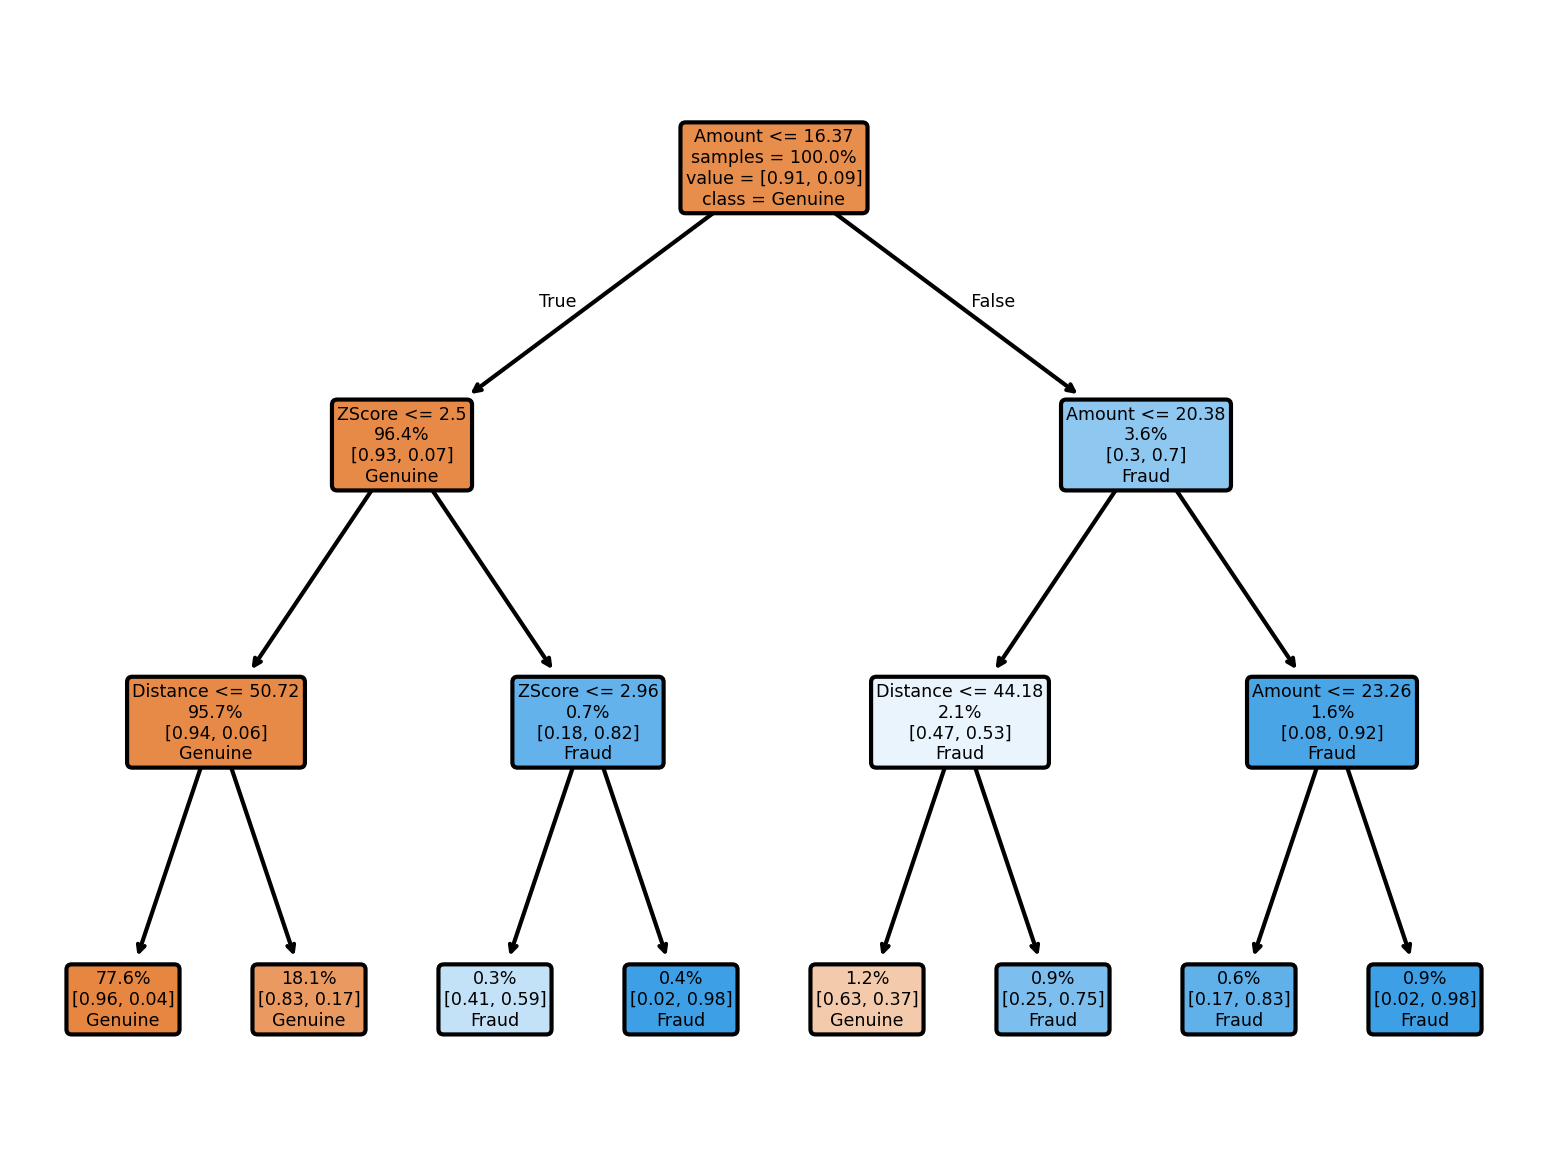

In [24]:
plt.figure(dpi=300)
sklearn.tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Genuine", "Fraud"], 
                       label="root", impurity=False, proportion=True, rounded=True, precision=2)

In [12]:
clf.predict(X_test)

array([False, False, False, ..., False, False, False], shape=(36461,))

In [15]:
clf.score(X_test, y_test)

0.9295137269959683

In [16]:
clf.score(X_train, y_train)

0.9297934051467008

In [17]:
clf.predict_proba(X_test)

array([[0.95998727, 0.04001273],
       [0.95998727, 0.04001273],
       [0.83349739, 0.16650261],
       ...,
       [0.95998727, 0.04001273],
       [0.95998727, 0.04001273],
       [0.83349739, 0.16650261]], shape=(36461, 2))